In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
mimicdata = pd.read_parquet(r'C:\Users\snsimha\OneDrive - Amsterdam UMC\Documenten\PhD\Design Trial\Code\Pacmed\Datasets\Rounded_12h\df_model_12h_forward_rounded_12h_windows.parquet')

In [7]:
mimicdata['admission_id'] = mimicdata.admission_timestamp.dt.strftime("%y%m%d%H") + "_" + mimicdata.hash_patient_id.str[:10]  # 10 chars enough to make unique

In [19]:
mimicdata.admission_id.unique()[:50]

array(['80072314_10000032', '89062708_10000980', '57112019_10001217',
       '57121915_10001217', '10041115_10001725', '31011104_10001884',
       '60051810_10002013', '29080412_10002155', '30092400_10002155',
       '31030921_10002155', '56041216_10002428', '56041918_10002428',
       '56043021_10002428', '56051114_10002428', '29061300_10002430',
       '83101800_10002443', '41052220_10002495', '41042013_10002760',
       '96041413_10002930', '98041721_10002930', '75100818_10003019',
       '54010215_10003046', '37022523_10003400', '37081019_10003400',
       '37081717_10003400', '69082621_10003502', '96022417_10004235',
       '44012622_10004401', '44021218_10004401', '44040510_10004401',
       '44041104_10004401', '44042120_10004401', '44051600_10004401',
       '44060520_10004401', '11011709_10004422', '41121710_10004457',
       '59022016_10004606', '86111219_10004720', '74120411_10004733',
       '68041209_10004764', '29081717_10005123', '30102712_10005348',
       '43120602_100

In [ ]:
mimicdata.vent_mode__last__last_12h.value_counts(dropna=False)

NaN                    305021
invasive_assisted      116833
invasive_controlled     86750
niv_unknown               716
niv_assisted               60
Name: vent_mode__last__last_12h, dtype: int64

: 

In [ ]:
mimicdata.loc[mimicdata.admission_id=="45110222_19999987"][["prediction_timestamp", "vent_mode__last__last_12h", "vent_mode__hours_since_last__last_12h"]]

,prediction_timestamp,vent_mode__last__last_12h,vent_mode__hours_since_last__last_12h
509376,2145-11-02 23:00:00,invasive_controlled,0.000000
509377,2145-11-03 11:00:00,invasive_controlled,4.000000
509378,2145-11-03 23:00:00,invasive_assisted,0.383333
509379,2145-11-04 11:00:00,NaN,NaN


In [15]:
mimicdata.loc[mimicdata.admission_id=="49010818_19999828"][["prediction_timestamp", "vent_mode__last__last_12h", "vent_mode__hours_since_last__last_12h"]]

,prediction_timestamp,vent_mode__last__last_12h,vent_mode__hours_since_last__last_12h
509361,2149-01-08 19:00:00,NaN,NaN
509362,2149-01-09 07:00:00,NaN,NaN
509363,2149-01-09 19:00:00,NaN,NaN
509364,2149-01-10 07:00:00,NaN,NaN


In [21]:
mimicdata.loc[mimicdata.admission_id=="11011709_10004422"][["prediction_timestamp", "vent_mode__last__last_12h", "vent_mode__hours_since_last__last_12h"]]

,prediction_timestamp,vent_mode__last__last_12h,vent_mode__hours_since_last__last_12h
333,2111-01-17 10:00:00,NaN,NaN
334,2111-01-17 22:00:00,invasive_assisted,0.0
335,2111-01-18 10:00:00,invasive_assisted,5.0
336,2111-01-18 22:00:00,NaN,NaN
337,2111-01-19 10:00:00,NaN,NaN
338,2111-01-19 22:00:00,NaN,NaN
339,2111-01-20 10:00:00,NaN,NaN
340,2111-01-20 22:00:00,NaN,NaN
341,2111-01-21 10:00:00,NaN,NaN
342,2111-01-21 22:00:00,NaN,NaN


In [23]:
mimicdata.loc[mimicdata.admission_id=="37081717_10003400"][["prediction_timestamp", "vent_mode__last__last_12h", "vent_mode__hours_since_last__last_12h"]]

,prediction_timestamp,vent_mode__last__last_12h,vent_mode__hours_since_last__last_12h
175,2137-08-17 18:00:00,NaN,NaN
176,2137-08-18 06:00:00,invasive_controlled,2.0
177,2137-08-18 18:00:00,invasive_controlled,3.0
178,2137-08-19 06:00:00,invasive_controlled,1.0
179,2137-08-19 18:00:00,invasive_controlled,2.0
180,2137-08-20 06:00:00,invasive_controlled,1.0
181,2137-08-20 18:00:00,invasive_assisted,2.5
182,2137-08-21 06:00:00,invasive_assisted,2.0
183,2137-08-21 18:00:00,invasive_controlled,5.0
184,2137-08-22 06:00:00,NaN,NaN


In [5]:
mimicdata["vent_mode__last__last_12h"] = mimicdata["vent_mode__last__last_12h"].cat.add_categories(["Unknown"])
mimicdata['vent_mode__last__last_12h'] = mimicdata['vent_mode__last__last_12h'].fillna('Unknown')

In [6]:
L_to_clip = [
 'bicarbonate_arterial__last__last_12h',
 'activated_partial_thromboplastin_time__last__last_12h',
 'temperature__mean__last_12h',
 'hemoglobin__last__last_12h',
 'heart_rate__mean__last_12h',
 'arterial_blood_pressure_mean__mean__last_12h',
 'creatinine__last__last_12h',
 'ureum__last__last_12h',
 'fluid_out_urine__total_value_extrapolated__last_12h',
 'lactate__last__last_12h',
 #'glasgow_coma_scale_total__last__last_12h',
 'pco2_arterial__mean__last_12h',
 'respiratory_rate_measured__mean__last_12h',
 'o2_saturation__mean__last_12h',
 'o2_flow__last__last_12h',
 'po2_arterial__mean__last_12h',
 #'vent_mode__last__last_12h',
 #'vent_mode__hours_since_last__last_12h'
 ]

In [7]:
def mask_sentinels(df, vars_to_clean, lower=0, upper=1e4):
    """
    Returns a copy of df where any value in vars_to_clean below 'lower'
    or above 'upper' is set to NaN.
    """
    df_clean = df.copy()

    df_clean[vars_to_clean] = df_clean[vars_to_clean].mask(
        (df_clean[vars_to_clean] < lower) | (df_clean[vars_to_clean] > upper),
        np.nan
    )

    return df_clean
mimicdata_clean = mask_sentinels(mimicdata, L_to_clip)

In [8]:
def clip_mean_iqr(df, vars_to_clip, k=4):
    """
    Two-sided robust clipping: mean ± k*IQR for each variable.
    k=4 by default.
    """
    df = df.copy()
    
    for col in vars_to_clip:
        # compute summary statistics
        mean = df[col].mean()
        q1   = df[col].quantile(0.25)
        q3   = df[col].quantile(0.75)
        iqr  = q3 - q1
        
        lower = mean - k * iqr
        upper = mean + k * iqr
        
        df[col] = df[col].clip(lower=lower, upper=upper)
    
    return df
mimicdata_clean = clip_mean_iqr(mimicdata_clean, L_to_clip, 4)


In [9]:
L_confounders = ['bicarbonate_arterial__last__last_12h',
 'activated_partial_thromboplastin_time__last__last_12h',
 'temperature__mean__last_12h',
 'hemoglobin__last__last_12h',
 'heart_rate__mean__last_12h',
 'arterial_blood_pressure_mean__mean__last_12h',
 'creatinine__last__last_12h',
 'ureum__last__last_12h',
 'fluid_out_urine__total_value_extrapolated__last_12h',
 'lactate__last__last_12h',
 'glasgow_coma_scale_total__last__last_12h',
 'pco2_arterial__mean__last_12h',
 'respiratory_rate_measured__mean__last_12h',
 'o2_saturation__mean__last_12h',
 'o2_flow__last__last_12h',
 'po2_arterial__mean__last_12h',
 'vent_mode__last__last_12h',
 'vent_mode__hours_since_last__last_12h']

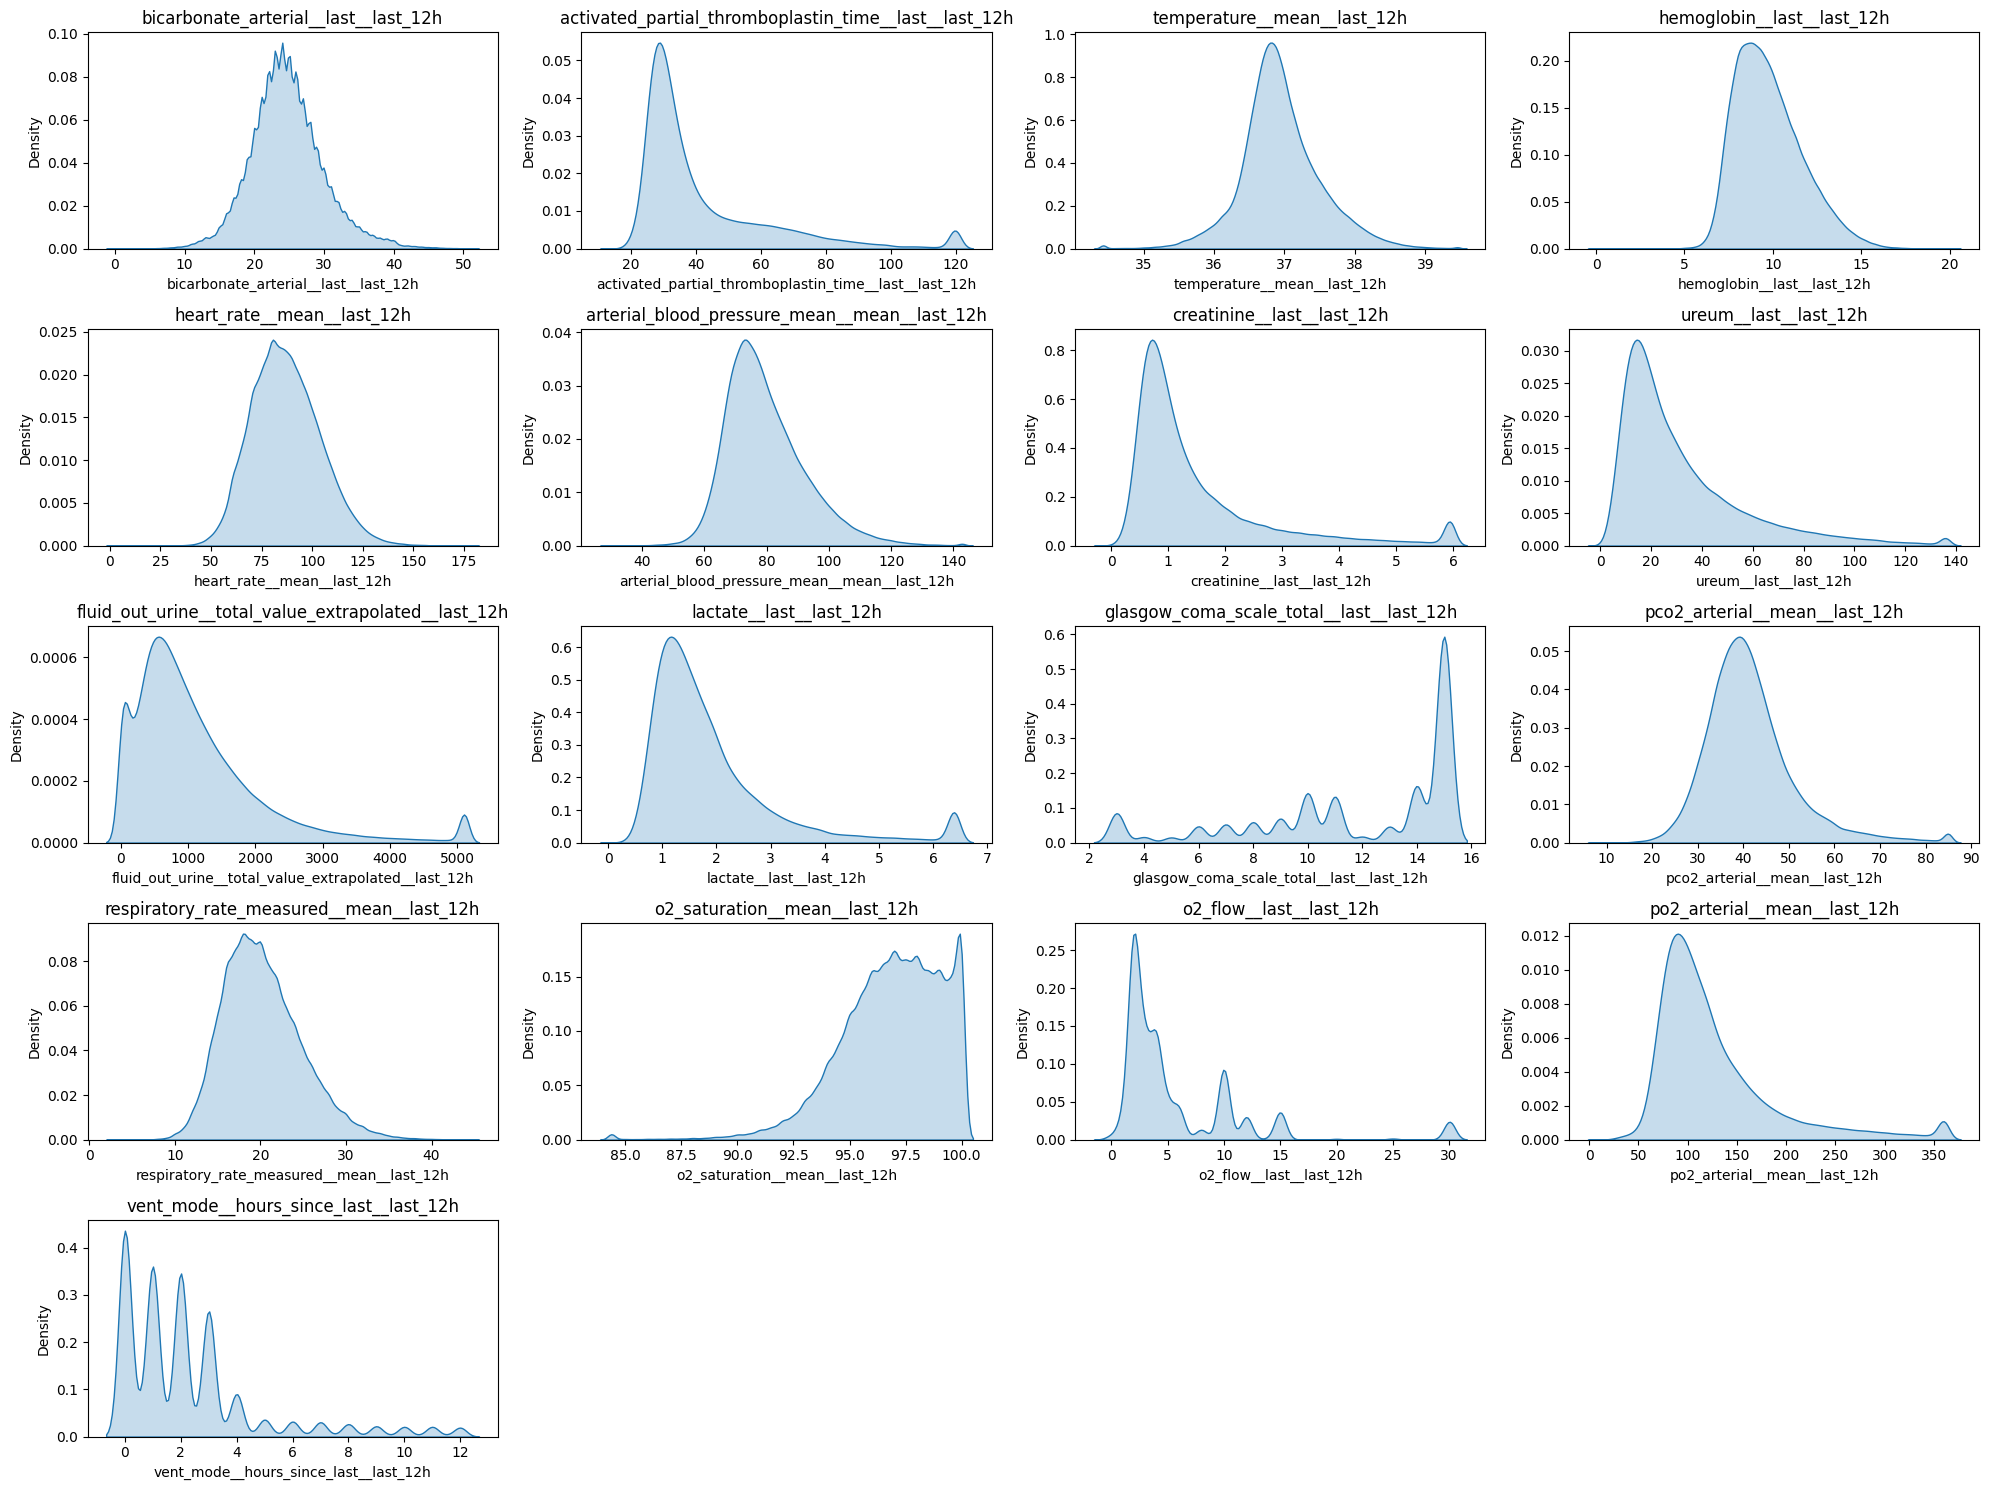

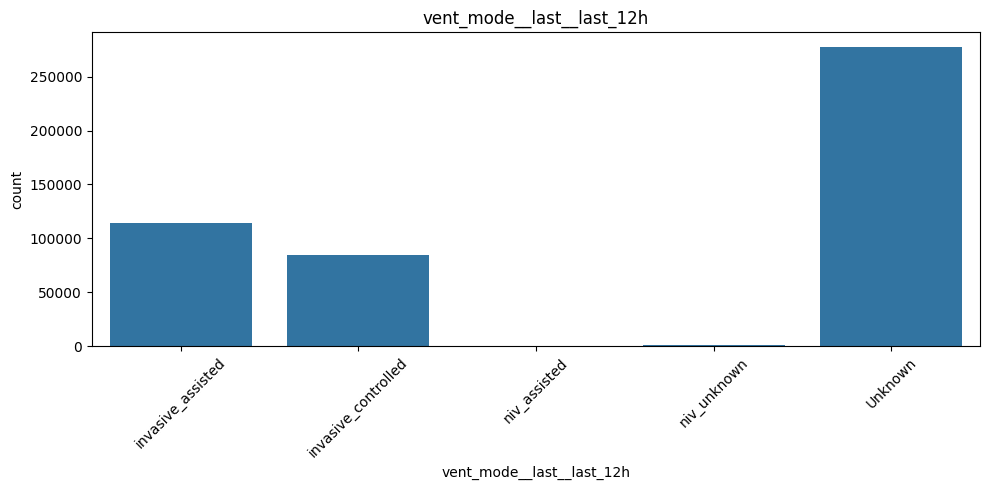

In [10]:
# Split categorical vs numerical
cat_var  = "vent_mode__last__last_12h"
num_vars = [v for v in L_confounders if v != cat_var]

# === NUMERIC VARIABLES: Density plots ===
n = len(num_vars)
cols = 4
rows = (n + cols - 1) // cols

plt.figure(figsize=(20, rows * 3))

for i, var in enumerate(num_vars, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data=mimicdata_clean, x=var, fill=True, bw_adjust=1)
    plt.title(var)
    plt.tight_layout()
plt.savefig("./for_numerics.pdf", dpi=300, bbox_inches='tight')
plt.show()

# === CATEGORICAL VARIABLE: Countplot ===
plt.figure(figsize=(10, 5))
sns.countplot(data=mimicdata_clean, x=cat_var)
plt.xticks(rotation=45)
plt.title(cat_var)
plt.tight_layout()
plt.savefig("./for_categorical.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [18]:
mimicdata_clean.admission_id

0         00010109_19373873
1         00010109_19373873
2         00010109_19373873
3         00010109_19373873
4         00010109_19373873
                ...        
477102    99123123_11304959
477103    99123123_11304959
477104    99123123_11304959
477105    99123123_11304959
477106    99123123_11304959
Name: admission_id, Length: 477107, dtype: object

In [ ]:
mimicdata_clean.loc[mimicdata_clean.vent_mode__hours_since_last__last_12h>11].vent_mode__last__last_12h.value_counts()

In [ ]:
# Inspecting vent_mode for a patient